In [26]:
#loading and normalizing the data
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image,ImageOps
%matplotlib inline

In [21]:
transform = transforms.Compose(
    [transforms.Resize(size=(32,32), interpolation=2),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.MNIST(root='./data',train=True,download=False,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.MNIST(root='./data',train=False,download=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

torch.Size([3, 32, 32])
 zero   two eight  zero


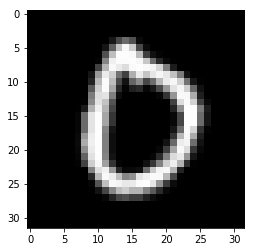

In [22]:
def imshow(img):
    print(img.shape)
    img = img / 2+ 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
#get some random training examples
dataiter = iter(trainloader)
images,labels = dataiter.next()


imshow(torchvision.utils.make_grid(images[0]))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [24]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #@self.pool2 = nn.Avg2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = LeNet()
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [27]:
#code on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
model = model.to(device)

In [30]:
#define a loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum = 0.9)

criterion = criterion.to(device)

In [31]:
#tarin the network
for epoch in range(10):
    running_loss = 0.0
    for i , data in enumerate(trainloader,0):
        #gets the inputs
        inputs,labels =data
        inputs = inputs.to(device)
        labels = labels.to(device)
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward+backward+optimize
        output = model(inputs)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        #print the statistics
        running_loss += loss.item()
        if i%2000 == 1999:              #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print("finished Training")


[1,  2000] loss: 0.632
[1,  4000] loss: 0.209
[1,  6000] loss: 0.189
[1,  8000] loss: 0.176
[1, 10000] loss: 0.151
[1, 12000] loss: 0.153
[1, 14000] loss: 0.153
[2,  2000] loss: 0.106
[2,  4000] loss: 0.105
[2,  6000] loss: 0.099
[2,  8000] loss: 0.108
[2, 10000] loss: 0.099
[2, 12000] loss: 0.108
[2, 14000] loss: 0.111
[3,  2000] loss: 0.064
[3,  4000] loss: 0.076
[3,  6000] loss: 0.090
[3,  8000] loss: 0.101
[3, 10000] loss: 0.105
[3, 12000] loss: 0.093
[3, 14000] loss: 0.071
[4,  2000] loss: 0.079
[4,  4000] loss: 0.084
[4,  6000] loss: 0.083
[4,  8000] loss: 0.067
[4, 10000] loss: 0.087
[4, 12000] loss: 0.090
[4, 14000] loss: 0.057
[5,  2000] loss: 0.077
[5,  4000] loss: 0.086
[5,  6000] loss: 0.083
[5,  8000] loss: 0.099
[5, 10000] loss: 0.074
[5, 12000] loss: 0.087
[5, 14000] loss: 0.095
[6,  2000] loss: 0.066
[6,  4000] loss: 0.073
[6,  6000] loss: 0.096
[6,  8000] loss: 0.086
[6, 10000] loss: 0.077
[6, 12000] loss: 0.107
[6, 14000] loss: 0.083
[7,  2000] loss: 0.100
[7,  4000] 

In [34]:
#testing
correct= 0
total= 0
for i , data in enumerate(testloader,0):
        #gets the inputs
        inputs,labels =data
        inputs = inputs.to(device)
        labels = labels.to(device)
        output = net(inputs)
        _,prediction= torch.max(output.data,1)
        correct += (prediction == labels).sum()
        total+= labels.size(0)

print("total {}, correct{}" .format(total,correct ))
print("Accuracy " + str(float(correct * 100. /total)))
print("finished Testing")


total 10000, correct9779
Accuracy 97.0
finished Testing
